# Import Libraries

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#to load dataset 
df=pd.read_csv('iris.csv')
#to display first 5 records 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#check dataset shape.
df.shape

(150, 5)

In [4]:
#check dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#check null values in dataset 
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
#check data type in dataset 
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
#to check duplicates 
df.duplicated().sum()


3

In [9]:
#remove duplicates permanetly
df.drop_duplicates(inplace=True)

In [10]:
#How many species are in dataset 
df["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

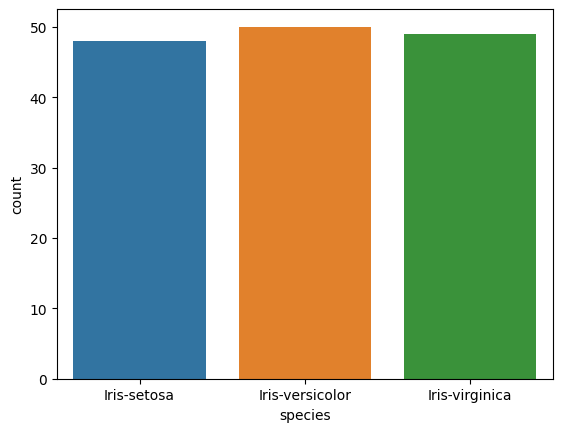

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64


In [11]:
#count of species count and visulize 
f=df["species"].value_counts()
sns.countplot(data=df,x="species")
plt.show()
print(f)

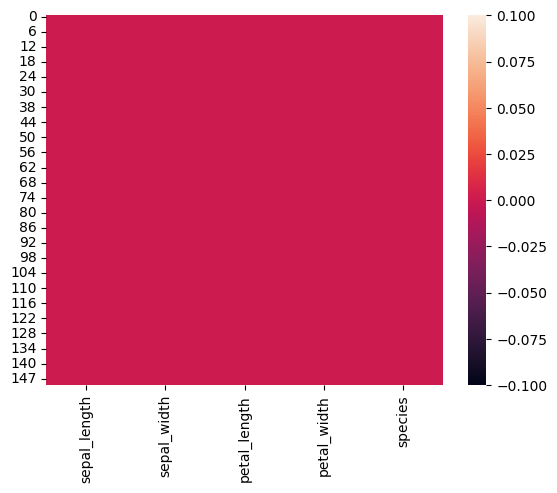

In [12]:
#check null value using heatmap
sns.heatmap(df.isnull())
plt.show()

In [14]:
# # Multivariate Plots
# # Relationships between each attribute
# sns.pairplot(df)
# plt.show()

# Appling Label Encoder

In [15]:
#apply LabelEncoder on species output column (change in number)
from sklearn.preprocessing import LabelEncoder
#create object of LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])
print(df.head())
print(df.dtypes)

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int32
dtype: object


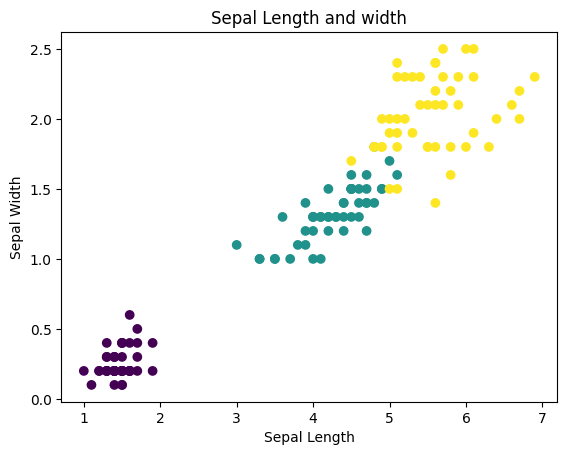

In [16]:
#we only take first 2 inputs 
X=df.iloc[:,2:4] 
#take output
Y=df['species']

#draw scatter plot
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y) #c means color , and pass output variable Y
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length and width')
plt.show()

# Selected Input and Output

In [17]:
#select input and output 
X=df.drop("species",axis=1) #select input
Y=df['species'] #select output

In [18]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)
#stratify=pass output variable for multclass classifier

In [19]:
X_train.shape,X_test.shape

((102, 4), (45, 4))

In [20]:
Y_train.value_counts(),Y_test.value_counts()

(1    35
 2    34
 0    33
 Name: species, dtype: int64,
 2    15
 0    15
 1    15
 Name: species, dtype: int64)

# Createing function 

In [21]:
#create a function 
def create_model(model):
    #train the model with 70% data
    model.fit(X_train,Y_train)
    #test the model with 30% data
    Y_pred=model.predict(X_test)
    #generate report 
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    acc = accuracy_score(Y_test,Y_pred).round(2) *100
    print("Accuracy Score",acc,"%")
    return model

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
#first apply standardscaler on X_train and X_test
from sklearn.preprocessing import StandardScaler
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [26]:

#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


# Decision Tree

In [27]:
#decision tree with ginni index
#ginni index
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=1)
dt=create_model(dt)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [28]:
#ginni index eith maxx deep
dt1=DecisionTreeClassifier(random_state=1,max_depth=3)
dt=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [29]:
dt1=DecisionTreeClassifier(random_state=1,max_depth=2)
dt=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
Accuracy Score 96.0 %


In [30]:
#ginni index with min sample leaf 
dt1=DecisionTreeClassifier(random_state=1,min_samples_leaf=100)
dt=create_model(dt1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.33      1.00      0.50        15
           2       0.00      0.00      0.00        15

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45

[[ 0 15  0]
 [ 0 15  0]
 [ 0 15  0]]
Accuracy Score 33.0 %


In [31]:
#decission tree using entropy 
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=3)
dt=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
Accuracy Score 96.0 %


In [32]:
#ENTROPY WITH MIN SAMPLE LEAF
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=100)
dt=create_model(dt1)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.33      1.00      0.50        15
           2       0.00      0.00      0.00        15

    accuracy                           0.33        45
   macro avg       0.11      0.33      0.17        45
weighted avg       0.11      0.33      0.17        45

[[ 0 15  0]
 [ 0 15  0]
 [ 0 15  0]]
Accuracy Score 33.0 %


In [33]:
dt1=DecisionTreeClassifier(random_state=1,criterion='entropy',min_samples_leaf=20)
dt=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
Accuracy Score 96.0 %


# Random Forest Classifier(RFC)

In [34]:
#RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=create_model(rf) 


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [35]:
#show the information gain of all input  feature 
IG=dt.feature_importances_
I=X.columns
d={"Input columns":I,"Inforamtion Gain":IG}
#converts into dataframe 
F=pd.DataFrame(d)
F.sort_values("Inforamtion Gain",ascending=False,ignore_index=True) #descending order 

,Input columns,Inforamtion Gain
0,petal_width,0.661312
1,petal_length,0.338688
2,sepal_length,0.000000
3,sepal_width,0.000000


# Boosting Techniques

In [36]:
#Using ADA Boosting
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=50,random_state=1)
ada=create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [37]:
#Gradient boosting 
from scipy.sparse.construct import random
#using gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=50,random_state=1)
gb=create_model(gb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [38]:
#Using extreme gradient boosting 
from sklearn.ensemble import GradientBoostingClassifier
xg=GradientBoostingClassifier(n_estimators=50,random_state=1)
xg=create_model(xg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [39]:
#USING LINEAR SVC
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [40]:
svc=LinearSVC(random_state=1,C=0.8)
svc=create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


In [41]:
svc=LinearSVC(random_state=1,C=0.9) 
svc=create_model(svc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


# Polynomial kernel function

In [42]:
#polynomial kernel function
from sklearn.svm import SVC 
svc=SVC(random_state=1,kernel="poly") 
svc=create_model(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.78      0.93      0.85        15
           2       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45

[[15  0  0]
 [ 0 14  1]
 [ 0  4 11]]
Accuracy Score 89.0 %


In [43]:
#SVC Radial Basis Kernel Function
svr=SVC(random_state=1,kernel='rbf')
svr=create_model(svr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
Accuracy Score 98.0 %


# K-Neighborsclassifer

In [44]:
#using KNeighborsclassifer 
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knc=create_model(knc) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.87      0.90        15
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]
Accuracy Score 93.0 %


In [45]:
#deploy the iris dataset 
import pickle 

In [49]:
file = open("iris_model.pkl","wb")
file2=open("scale.pkl","wb")
pickle.dump(svc,file)
pickle.dump(ss,file2)
file.close()
file2.close()

In [50]:
file = open("iris_model.pkl","rb")
file2 = open("scale.pkl","rb")

In [51]:
model = pickle.load(file)
s=pickle.load(file2)

In [52]:
X=[5.1,3.5,1.4,0.2]
X=np.array([X])
X.ndim

2

In [53]:
X=s.transform(X)

In [54]:
Y_pred1=model.predict(X)[0]
if Y_pred1==0:
    r='versicolor'
elif Y_pred1==1:
    r='virginica'
else:
    r='setosa'
print(r)

versicolor
